# Assignment 6

In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### Import Data

In [2]:
trump_tweets = pd.read_csv('realDonaldTrump.csv',encoding='mac_roman')
obama_tweets = pd.read_csv('BarackObama.csv',encoding='mac_roman')

#### View Data

In [3]:
trump_tweets

,created_at,text,url,replies,retweets,favorites,user
0,10/23/17 12:30,I had a very respectful conversation with the ...,https://twitter.com/realDonaldTrump/status/922...,46228,10243,49468,realDonaldTrump
1,10/23/17 11:53,Two dozen NFL players continue to kneel during...,https://twitter.com/realDonaldTrump/status/922...,31419,14006,62406,realDonaldTrump
2,10/23/17 11:42,There will be NO change to your 401(k). This h...,https://twitter.com/realDonaldTrump/status/922...,9552,13719,62662,realDonaldTrump
3,10/22/17 12:08,It is finally sinking through. 46% OF PEOPLE B...,https://twitter.com/realDonaldTrump/status/922...,56238,25102,112890,realDonaldTrump
4,10/22/17 12:02,Wacky Congresswoman Wilson is the gift that ke...,https://twitter.com/realDonaldTrump/status/922...,32136,21573,97145,realDonaldTrump
...,...,...,...,...,...,...,...
3227,8/24/16 22:39,Thank you for your support!\r#AmericaFirst #Im...,https://twitter.com/realDonaldTrump/status/768...,1693,6441,18401,realDonaldTrump
3228,8/24/16 21:32,"A great afternoon in Tampa, Florida. Thank you...",https://twitter.com/realDonaldTrump/status/768...,1148,4837,16968,realDonaldTrump
3229,8/24/16 17:24,New national poll released. Join the MOVEMENT ...,https://twitter.com/realDonaldTrump/status/768...,2737,5991,16619,realDonaldTrump
3230,8/24/16 16:42,Great new poll Florida - thank you! #MakeAmeri...,https://twitter.com/realDonaldTrump/status/768...,1888,7288,20072,realDonaldTrump


In [4]:
obama_tweets

,created_at,text,url,replies,retweets,favorites,user
0,10/16/17 22:59,I'm grateful to @SenJohnMcCain for his lifetim...,https://twitter.com/BarackObama/status/9200615...,17064,89916,641842,BarackObama
1,10/2/17 12:41,Michelle &amp; I are praying for the victims i...,https://twitter.com/BarackObama/status/9148326...,21588,405895,1715753,BarackObama
2,9/30/17 2:22,Proud to cheer on Team USA at the Invictus Gam...,https://twitter.com/BarackObama/status/9139520...,8476,60651,503255,BarackObama
3,9/26/17 17:03,We're expanding our efforts to help Puerto Ric...,https://twitter.com/BarackObama/status/9127244...,10657,113807,334901,BarackObama
4,9/25/17 23:36,"Prosecutor, soldier, family man, citizen. Beau...",https://twitter.com/BarackObama/status/9124608...,3886,58449,328106,BarackObama
...,...,...,...,...,...,...,...
3202,8/15/14 20:16,Earning the minimum wage while raising a famil...,https://twitter.com/BarackObama/status/5003754...,536,1520,2155,BarackObama
3203,8/15/14 18:02,FACT: 97% of scientists and NASA accept the sc...,https://twitter.com/BarackObama/status/5003418...,531,2103,2377,BarackObama
3204,8/15/14 16:21,Getting covered made Jason so happy he wanted ...,https://twitter.com/BarackObama/status/5003164...,206,261,721,BarackObama
3205,8/15/14 15:15,It's time to get serious and #ActOnClimate. ht...,https://twitter.com/BarackObama/status/5002997...,509,2009,2273,BarackObama


#### VADER's SentimentIntensityAnalyzer to get the sentiment scores

In [5]:
trump_text = trump_tweets['text']
obama_text = obama_tweets['text']

In [6]:
# Trump
a = trump_text[1]
print(a)

Two dozen NFL players continue to kneel during the National Anthem, showing total disrespect to our Flag &amp; Country.  No leadership in NFL!


In [7]:
sia.polarity_scores(a)

{'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'compound': -0.6476}

In [8]:
# Obama
b = obama_text[1]
print(b)

Michelle &amp; I are praying for the victims in Las Vegas. Our thoughts are with their families &amp; everyone enduring another senseless tragedy.


In [9]:
sia.polarity_scores(b)

{'neg': 0.238, 'neu': 0.674, 'pos': 0.089, 'compound': -0.6369}

In [10]:
# NEG, NEU, POS
analyzer = SentimentIntensityAnalyzer()

In [11]:
# Trump
trump_tweets['neg'] = trump_tweets['text'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
trump_tweets['neu'] = trump_tweets['text'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
trump_tweets['pos'] = trump_tweets['text'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
trump_tweets['compound'] = trump_tweets['text'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
trump_tweets['comp_score'] = trump_tweets['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
trump_tweets

,created_at,text,url,replies,retweets,favorites,user,neg,neu,pos,compound,comp_score
0,10/23/17 12:30,I had a very respectful conversation with the ...,https://twitter.com/realDonaldTrump/status/922...,46228,10243,49468,realDonaldTrump,0.000,0.769,0.231,0.6596,pos
1,10/23/17 11:53,Two dozen NFL players continue to kneel during...,https://twitter.com/realDonaldTrump/status/922...,31419,14006,62406,realDonaldTrump,0.201,0.799,0.000,-0.6476,neg
2,10/23/17 11:42,There will be NO change to your 401(k). This h...,https://twitter.com/realDonaldTrump/status/922...,9552,13719,62662,realDonaldTrump,0.094,0.675,0.231,0.6439,pos
3,10/22/17 12:08,It is finally sinking through. 46% OF PEOPLE B...,https://twitter.com/realDonaldTrump/status/922...,56238,25102,112890,realDonaldTrump,0.323,0.677,0.000,-0.8599,neg
4,10/22/17 12:02,Wacky Congresswoman Wilson is the gift that ke...,https://twitter.com/realDonaldTrump/status/922...,32136,21573,97145,realDonaldTrump,0.123,0.629,0.248,0.4926,pos
...,...,...,...,...,...,...,...,...,...,...,...,...
3227,8/24/16 22:39,Thank you for your support!\r#AmericaFirst #Im...,https://twitter.com/realDonaldTrump/status/768...,1693,6441,18401,realDonaldTrump,0.000,0.522,0.478,0.6696,pos
3228,8/24/16 21:32,"A great afternoon in Tampa, Florida. Thank you...",https://twitter.com/realDonaldTrump/status/768...,1148,4837,16968,realDonaldTrump,0.000,0.504,0.496,0.7840,pos
3229,8/24/16 17:24,New national poll released. Join the MOVEMENT ...,https://twitter.com/realDonaldTrump/status/768...,2737,5991,16619,realDonaldTrump,0.000,0.839,0.161,0.3595,pos
3230,8/24/16 16:42,Great new poll Florida - thank you! #MakeAmeri...,https://twitter.com/realDonaldTrump/status/768...,1888,7288,20072,realDonaldTrump,0.000,0.465,0.535,0.7840,pos


In [12]:
# Obama
obama_tweets['neg'] = obama_tweets['text'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
obama_tweets['neu'] = obama_tweets['text'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
obama_tweets['pos'] = obama_tweets['text'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
obama_tweets['compound'] = obama_tweets['text'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
obama_tweets['comp_score'] = obama_tweets['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
obama_tweets

,created_at,text,url,replies,retweets,favorites,user,neg,neu,pos,compound,comp_score
0,10/16/17 22:59,I'm grateful to @SenJohnMcCain for his lifetim...,https://twitter.com/BarackObama/status/9200615...,17064,89916,641842,BarackObama,0.000,0.544,0.456,0.9246,pos
1,10/2/17 12:41,Michelle &amp; I are praying for the victims i...,https://twitter.com/BarackObama/status/9148326...,21588,405895,1715753,BarackObama,0.238,0.674,0.089,-0.6369,neg
2,9/30/17 2:22,Proud to cheer on Team USA at the Invictus Gam...,https://twitter.com/BarackObama/status/9139520...,8476,60651,503255,BarackObama,0.000,0.579,0.421,0.9300,pos
3,9/26/17 17:03,We're expanding our efforts to help Puerto Ric...,https://twitter.com/BarackObama/status/9127244...,10657,113807,334901,BarackObama,0.000,0.811,0.189,0.5994,pos
4,9/25/17 23:36,"Prosecutor, soldier, family man, citizen. Beau...",https://twitter.com/BarackObama/status/9124608...,3886,58449,328106,BarackObama,0.056,0.748,0.196,0.4588,pos
...,...,...,...,...,...,...,...,...,...,...,...,...
3202,8/15/14 20:16,Earning the minimum wage while raising a famil...,https://twitter.com/BarackObama/status/5003754...,536,1520,2155,BarackObama,0.171,0.829,0.000,-0.5106,neg
3203,8/15/14 18:02,FACT: 97% of scientists and NASA accept the sc...,https://twitter.com/BarackObama/status/5003418...,531,2103,2377,BarackObama,0.000,0.833,0.167,0.3818,pos
3204,8/15/14 16:21,Getting covered made Jason so happy he wanted ...,https://twitter.com/BarackObama/status/5003164...,206,261,721,BarackObama,0.000,0.717,0.283,0.6948,pos
3205,8/15/14 15:15,It's time to get serious and #ActOnClimate. ht...,https://twitter.com/BarackObama/status/5002997...,509,2009,2273,BarackObama,0.157,0.843,0.000,-0.0772,neg


#### Compare the sentiment scores of the two dataframes by:

In [13]:
# Calculating the mean and standard deviation of the sentiment scores for each dataframe

In [14]:
trump_compound = trump_tweets['compound']
print('Mean of the sentiment scores: ', statistics.mean(trump_compound))
print('Standard Deviation of the sentiment scores: ', statistics.stdev(trump_compound))

Mean of the sentiment scores:  0.18796383044554454
Standard Deviation of the sentiment scores:  0.541958272454006


In [15]:
obama_compound = obama_tweets['compound']
print('Mean of the sentiment scores: ', statistics.mean(obama_compound))
print('Standard Deviation of the sentiment scores: ', statistics.stdev(obama_compound))

Mean of the sentiment scores:  0.19910617399438726
Standard Deviation of the sentiment scores:  0.37872101501899325


In [16]:
# Making a histogram plot showing the distribution of sentiment scores for each dataframe

Text(0.5, 0, 'Compound Value in Sentiment Analysis')

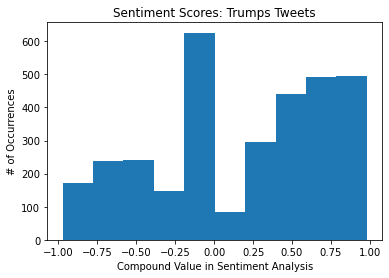

In [17]:
plt.hist(trump_compound)
plt.title('Sentiment Scores: Trumps Tweets')
plt.ylabel('# of Occurrences')
plt.xlabel('Compound Value in Sentiment Analysis')

Text(0.5, 0, 'Compound Value in Sentiment Analysis')

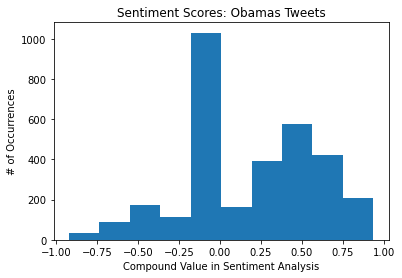

In [18]:
plt.hist(obama_compound)
plt.title('Sentiment Scores: Obamas Tweets')
plt.ylabel('# of Occurrences')
plt.xlabel('Compound Value in Sentiment Analysis')

In [19]:
# Printing examples of the most positively and most negatively scored tweets from each dataframe 

In [20]:
# Trump
print(min(trump_compound))
print(max(trump_compound))

-0.9735
0.9805


In [21]:
trump_min = -0.9735
trump_tweets.loc[trump_tweets['compound'] == trump_min]

,created_at,text,url,replies,retweets,favorites,user,neg,neu,pos,compound,comp_score
1431,4/18/17 10:38,Democrat Jon Ossoff would be a disaster in Con...,https://twitter.com/realDonaldTrump/status/854...,12950,14207,56073,realDonaldTrump,0.555,0.445,0.0,-0.9735,neg


In [22]:
print('Min Tweet:', trump_text[1431])

Min Tweet: Democrat Jon Ossoff would be a disaster in Congress. VERY weak on crime and illegal immigration, bad for jobs and wants higher taxes. Say NO


In [23]:
trump_max = 0.9805
trump_tweets.loc[trump_tweets['compound'] == trump_max]

,created_at,text,url,replies,retweets,favorites,user,neg,neu,pos,compound,comp_score
458,9/7/17 12:33,Hurricane Irma is raging but we have great tea...,https://twitter.com/realDonaldTrump/status/905...,6457,16565,82003,realDonaldTrump,0.046,0.377,0.577,0.9805,pos


In [24]:
print('Max Tweet:', trump_text[458])

Max Tweet: Hurricane Irma is raging but we have great teams of talented and brave people already in place and ready to help. Be careful, be safe! #FEMA


In [25]:
# Obama
print(min(obama_compound))
print(max(obama_compound))

-0.9201
0.9349


In [26]:
obama_min = -0.9201
obama_tweets.loc[obama_tweets['compound'] == obama_min]

,created_at,text,url,replies,retweets,favorites,user,neg,neu,pos,compound,comp_score
453,6/21/16 15:46,RT @POTUS: Gun violence requires more than mom...,https://twitter.com/BarackObama/status/7452818...,4272,64984,120391,BarackObama,0.408,0.592,0.0,-0.9201,neg


In [27]:
print('Min Tweet:', obama_text[453])

Min Tweet: RT @POTUS: Gun violence requires more than moments of silence. It requires action. In failing that test, the Senate failed the American peo‰Û_


In [28]:
obama_max = 0.9349
obama_tweets.loc[obama_tweets['compound'] == obama_max]

,created_at,text,url,replies,retweets,favorites,user,neg,neu,pos,compound,comp_score
723,3/27/16 17:43,"""We wish all who celebrate a blessed and joyfu...",https://twitter.com/BarackObama/status/7141457...,1140,7866,32989,BarackObama,0.0,0.360,0.640,0.9349,pos
1618,8/4/15 21:13,Help President Obama celebrate another great y...,https://twitter.com/BarackObama/status/6286750...,1516,2382,6101,BarackObama,0.0,0.388,0.612,0.9349,pos


In [29]:
print('Max Tweet:', trump_text[723])
print('Max Tweet:', trump_text[1618])

Max Tweet: RT @IvankaTrump: Since @realDonaldTrump inauguration, over 1 million net new jobs have been created in the American economy! #MAGA
Max Tweet: 45,000 construction &amp; manufacturing jobs in the U.S. Gulf Coast region. $20 billion investment. We are already winning again, America!


In [30]:
# Commenting on how the two sets differ + VADER's performance

Obama has two tweets that have the same highest compound score. In addition, Obama's highest neg and pos tweets are from 2015-2016 while Trump's is slightly more recent with the highest neg and pos tweets being from 2017.

Overall, VADER does a good job deciding what tweets are positive or negative on the surface level. However, it is not able to understand the actual context of the tweets.

### Topic Modeling of Trump & Obama Tweets

In [31]:
# Use gensim and LDA to perform topic modeling on the tweets of each dataframe.
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
# Trump
myStopWords = list(punctuation) + stopwords.words('english')
[w for w in word_tokenize(trump_text[0].lower()) if w not in myStopWords]

['respectful',
 'conversation',
 'widow',
 'sgt',
 'la',
 'david',
 'johnson',
 'spoke',
 'name',
 'beginning',
 'without',
 'hesitation']

In [33]:
docs = []
for i in trump_text:
    docs.append([w for w in word_tokenize(i.lower()) if w not in myStopWords])
    
trump_text[0]

'I had a very respectful conversation with the widow of Sgt. La David Johnson, and spoke his name from beginning, without hesitation!'

In [34]:
p_stemmer = PorterStemmer()

docs_stemmed = []
for i in docs:
    docs_stemmed.append([p_stemmer.stem(w) for w in i])
    
docs_stemmed[0]

['respect',
 'convers',
 'widow',
 'sgt',
 'la',
 'david',
 'johnson',
 'spoke',
 'name',
 'begin',
 'without',
 'hesit']

In [35]:
dictionary = corpora.Dictionary(docs_stemmed)
len(dictionary)

7336

In [36]:
dictionary.filter_extremes(no_below=10, no_above=0.5)
len(dictionary)

751

In [37]:
print(dictionary.token2id)

{'begin': 0, 'david': 1, 'la': 2, 'name': 3, 'respect': 4, 'spoke': 5, 'without': 6, 'amp': 7, 'anthem': 8, 'continu': 9, 'countri': 10, 'disrespect': 11, 'flag': 12, 'leadership': 13, 'nation': 14, 'nfl': 15, 'player': 16, 'show': 17, 'total': 18, 'two': 19, 'alway': 20, 'chang': 21, 'class': 22, 'great': 23, 'middl': 24, 'popular': 25, 'stay': 26, 'tax': 27, 'work': 28, 'believ': 29, 'even': 30, 'fabric': 31, 'fake': 32, 'final': 33, 'lost': 34, 'major': 35, 'news': 36, 'peopl': 37, 'stori': 38, 'wors': 39, 'action': 40, 'dem': 41, 'disast': 42, 'give': 43, 'keep': 44, 'parti': 45, 'r': 46, 'republican': 47, 'vote': 48, 'watch': 49, 'a.m.': 50, 'enjoy': 51, 'foxnew': 52, 'interview': 53, 'today': 54, '...': 55, 'court': 56, 'histor': 57, 'isi': 58, 'justic': 59, 'market': 60, 'militari': 61, 'record': 62, 'stock': 63, 'strong': 64, 'suprem': 65, '....': 66, '50': 67, 'administr': 68, 'approv': 69, 'border': 70, 'cut': 71, 'energi': 72, 'freedom': 73, 'legisl': 74, 'massiv': 75, 'mont

In [38]:
print(dictionary.token2id['vote'])
print(dictionary.token2id['american'])
print(dictionary[33])
print(dictionary[700])

48
154
final
dnc


In [39]:
corpus = [dictionary.doc2bow(text) for text in docs_stemmed]
print(corpus[30])

[(23, 1), (28, 1), (44, 1), (55, 1), (58, 1), (88, 1), (89, 1), (117, 2), (190, 1), (191, 1), (192, 1)]


In [40]:
wordid = corpus[30][0]
print(dictionary[wordid[0]],wordid[1])

for i in corpus[30]:
    print(dictionary[i[0]], i[1])

great 1
great 1
work 1
keep 1
... 1
isi 1
'' 1
`` 1
http 2
100 1
lose 1
“ 1


In [41]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, 
                                           num_topics=20, 
                                           id2word = dictionary, 
                                           passes=5)
ldamodel.show_topics(num_topics=20)

[(0,
  '0.168*"http" + 0.079*"thank" + 0.043*"amp" + 0.042*"ohio" + 0.029*"great" + 0.023*"live" + 0.020*"join" + 0.018*"americafirst" + 0.018*"watch" + 0.018*"w/"'),
 (1,
  '0.051*"clinton" + 0.039*"hillari" + 0.031*"fbi" + 0.024*"http" + 0.023*"lie" + 0.019*"mani" + 0.019*"campaign" + 0.018*"elect" + 0.018*"..." + 0.017*"believ"'),
 (2,
  '0.171*"rt" + 0.097*"http" + 0.081*"realdonaldtrump" + 0.036*"\'s" + 0.035*"amp" + 0.022*"crookedhillari" + 0.017*"potu" + 0.017*"danscavino" + 0.016*"fail" + 0.015*"foxandfriend"'),
 (3,
  '0.175*"http" + 0.042*"makeamericagreatagain" + 0.029*"honor" + 0.029*"today" + 0.024*"american" + 0.024*"famili" + 0.016*"welcom" + 0.015*"take" + 0.015*"minist" + 0.014*"protect"'),
 (4,
  '0.118*"http" + 0.078*"great" + 0.060*"thank" + 0.053*"maga" + 0.034*"debat" + 0.032*"day" + 0.032*"support" + 0.023*"nation" + 0.023*"movement" + 0.022*"today"'),
 (5,
  '0.048*"obamacar" + 0.032*"repeal" + 0.032*"year" + 0.030*"replac" + 0.027*"great" + 0.026*"peopl" + 0.02

In [42]:
for i in ldamodel.print_topics(num_topics=20, num_words=20):
    print(i[0])
    print(i[1])
    print('\n')

0
0.168*"http" + 0.079*"thank" + 0.043*"amp" + 0.042*"ohio" + 0.029*"great" + 0.023*"live" + 0.020*"join" + 0.018*"americafirst" + 0.018*"watch" + 0.018*"w/" + 0.017*"rt" + 0.016*"governor" + 0.015*"maga" + 0.015*"help" + 0.014*"get" + 0.013*"us" + 0.012*"wisconsin" + 0.010*"icymi" + 0.010*"job" + 0.009*"texa"


1
0.051*"clinton" + 0.039*"hillari" + 0.031*"fbi" + 0.024*"http" + 0.023*"lie" + 0.019*"mani" + 0.019*"campaign" + 0.018*"elect" + 0.018*"..." + 0.017*"believ" + 0.017*"john" + 0.013*"amp" + 0.013*"lost" + 0.013*"``" + 0.012*"media" + 0.012*"hack" + 0.012*"rig" + 0.012*"total" + 0.012*"''" + 0.012*"investig"


2
0.171*"rt" + 0.097*"http" + 0.081*"realdonaldtrump" + 0.036*"'s" + 0.035*"amp" + 0.022*"crookedhillari" + 0.017*"potu" + 0.017*"danscavino" + 0.016*"fail" + 0.015*"foxandfriend" + 0.014*"corrupt" + 0.014*"leadership" + 0.013*"trump" + 0.012*"mike_p" + 0.012*"rapid" + 0.012*"call" + 0.011*"``" + 0.010*"love" + 0.009*"put" + 0.008*"maga"


3
0.175*"http" + 0.042*"makeamer

In [43]:
# Obama
myStopWords = list(punctuation) + stopwords.words('english')
[w for w in word_tokenize(obama_text[0].lower()) if w not in myStopWords]

["'m",
 'grateful',
 'senjohnmccain',
 'lifetime',
 'service',
 'country',
 'congratulations',
 'john',
 'receiving',
 'year',
 "'s",
 'liberty',
 'medal']

In [44]:
docs = []
for i in obama_text:
    docs.append([w for w in word_tokenize(i.lower()) if w not in myStopWords])
    
obama_text[0]

"I'm grateful to @SenJohnMcCain for his lifetime of service to our country. Congratulations, John, on receiving this year's Liberty Medal."

In [63]:
p_stemmer = PorterStemmer()

docs_stemmed1 = []
for i in docs:
    docs_stemmed1.append([p_stemmer.stem(w) for w in i])
    
docs_stemmed1[0]

["'m",
 'grate',
 'senjohnmccain',
 'lifetim',
 'servic',
 'countri',
 'congratul',
 'john',
 'receiv',
 'year',
 "'s",
 'liberti',
 'medal']

In [64]:
dictionary1 = corpora.Dictionary(docs_stemmed1)
len(dictionary1)

6936

In [65]:
dictionary1.filter_extremes(no_below=10, no_above=0.5)
len(dictionary1)

542

In [66]:
print(dictionary1.token2id)

{"'m": 0, "'s": 1, 'countri': 2, 'servic': 3, 'year': 4, 'amp': 5, 'anoth': 6, 'everyon': 7, 'famili': 8, 'michel': 9, 'thought': 10, 'best': 11, 'friend': 12, 'game': 13, 'proud': 14, 'team': 15, 'today': 16, "'re": 17, 'american': 18, 'effort': 19, 'expand': 20, 'fellow': 21, 'help': 22, 'join': 23, 'need': 24, 'right': 25, 'us': 26, 'better': 27, 'leav': 28, 'made': 29, 'want': 30, 'address': 31, 'presid': 32, 'rt': 33, 'start': 34, 'tune': 35, 'think': 36, 'tonight': 37, 'everi': 38, 'import': 39, 'kid': 40, 'make': 41, 'sure': 42, 'thank': 43, 'work': 44, 'chang': 45, 'inspir': 46, 'peopl': 47, 'world': 48, 'act': 49, 'ever': 50, 'honor': 51, 'across': 52, 'answer': 53, 'call': 54, 'u.s.': 55, 'futur': 56, 'hope': 57, 'mind': 58, 'young': 59, 'alway': 60, 'done': 61, 'noth': 62, 'statement': 63, 'first': 64, 'stand': 65, "''": 66, '...': 67, '``': 68, 'come': 69, 'love': 70, 'learn': 71, 'must': 72, 'one': 73, 'person': 74, "'ve": 75, 'give': 76, 'know': 77, "n't": 78, 'care': 79,

In [70]:
print(dictionary1.token2id['wind'])
print(dictionary1.token2id['wage'])
print(dictionary1[150])
print(dictionary1[530])

391
155
momentum
bill


In [73]:
corpus = [dictionary1.doc2bow(text) for text in docs_stemmed1]
print(corpus[30])

[(1, 1), (24, 1), (40, 1), (95, 1), (105, 1), (106, 1)]


In [74]:
wordid = corpus[30][0]
print(dictionary1[wordid[0]],wordid[1])

for i in corpus[30]:
    print(dictionary1[i[0]], i[1])

's 1
's 1
need 1
kid 1
protect 1
hard 1
like 1


In [75]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, 
                                           num_topics=20, 
                                           id2word = dictionary1, 
                                           passes=5)
ldamodel.show_topics(num_topics=20)

[(0,
  '0.178*"rt" + 0.108*"whitehous" + 0.053*"‰" + 0.047*"õ" + 0.027*"news" + 0.027*"great" + 0.026*"\'s" + 0.024*"potu" + 0.020*"flotu" + 0.017*"assault"'),
 (1,
  '0.075*"ofa" + 0.061*"get" + 0.043*"\'s" + 0.042*"let" + 0.032*"countri" + 0.031*"across" + 0.031*"organ" + 0.030*"go" + 0.026*"team" + 0.025*"fact"'),
 (2,
  '0.084*"senat" + 0.071*"doyourjob" + 0.053*"leader" + 0.048*"judg" + 0.046*"garland" + 0.044*"fair" + 0.044*"suprem" + 0.043*"court" + 0.039*"hear" + 0.034*"vote"'),
 (3,
  '0.180*"presid" + 0.147*"obama" + 0.065*"live" + 0.060*"watch" + 0.058*"speak" + 0.042*"tune" + 0.038*"et" + 0.030*"p.m." + 0.025*"happen" + 0.023*"deliv"'),
 (4,
  '0.059*"actonclim" + 0.052*"support" + 0.033*"name" + 0.033*"clean" + 0.032*"plan" + 0.030*"power" + 0.030*"pollut" + 0.026*"add" + 0.026*"carbon" + 0.025*"invest"'),
 (5,
  '0.092*"equal" + 0.060*"day" + 0.056*"pay" + 0.043*"retweet" + 0.041*"women" + 0.038*"loveislov" + 0.031*"marriag" + 0.029*"agre" + 0.028*"work" + 0.027*"think"')

In [76]:
for i in ldamodel.print_topics(num_topics=20, num_words=20):
    print(i[0])
    print(i[1])
    print('\n')

0
0.178*"rt" + 0.108*"whitehous" + 0.053*"‰" + 0.047*"õ" + 0.027*"news" + 0.027*"great" + 0.026*"'s" + 0.024*"potu" + 0.020*"flotu" + 0.017*"assault" + 0.017*"‰û_" + 0.016*"1st" + 0.014*"//‰û_" + 0.014*"watch" + 0.013*"world" + 0.012*"amp" + 0.012*"//t.c‰û_" + 0.012*"today" + 0.012*"help" + 0.011*"worth"


1
0.075*"ofa" + 0.061*"get" + 0.043*"'s" + 0.042*"let" + 0.032*"countri" + 0.031*"across" + 0.031*"organ" + 0.030*"go" + 0.026*"team" + 0.025*"fact" + 0.024*"readi" + 0.023*"help" + 0.023*"holiday" + 0.022*"2015" + 0.021*"join" + 0.020*"love" + 0.019*"cover" + 0.018*"truth" + 0.018*"like" + 0.016*"fight"


2
0.084*"senat" + 0.071*"doyourjob" + 0.053*"leader" + 0.048*"judg" + 0.046*"garland" + 0.044*"fair" + 0.044*"suprem" + 0.043*"court" + 0.039*"hear" + 0.034*"vote" + 0.028*"deserv" + 0.024*"'s" + 0.023*"polit" + 0.020*"give" + 0.019*"time" + 0.016*"scotu" + 0.015*"nomin" + 0.015*"tell" + 0.014*"vacanc" + 0.014*"game"


3
0.180*"presid" + 0.147*"obama" + 0.065*"live" + 0.060*"watch"